In [67]:
import pandas as pd
from IPython.display import display

flightdata = pd.read_csv(r'C:\Users\prabr\Desktop\GroupProjectWork\AirTraffic\API_IS.AIR.PSGR_DS2_en_csv_v2_20.csv')


display(flightdata.head())
display(flightdata.columns)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,223502.00,274280.00,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,36350758.95,39154692.0,41553429.0,45423814.08,52613964.08,5.485142e+07,1.916604e+07,2.405759e+07,NaN,NaN
2,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,2209428.00,1929907.0,1917924.0,1647425.00,1125367.00,1.066747e+06,4.490410e+05,2.932130e+05,NaN,NaN
3,Africa Western and Central,AFW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,8030237.17,8696300.0,8129874.0,8837017.00,12337766.28,1.138491e+07,5.328945e+06,7.425487e+06,NaN,NaN
4,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,1409952.00,1244491.0,1482546.0,1375523.00,1516628.00,1.436959e+06,3.566950e+05,3.114880e+05,NaN,NaN


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [68]:
flightdata["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

Continents are included and therefore should be removed


In [69]:
flightdata=flightdata[~flightdata["Country Name"].isin(["Asia","Europe","World","North America","South America","Oceania","South America","Antarctica","Africa"])]

In [70]:
flightdata=flightdata.drop("Country Code",axis=1).drop("Indicator Name",axis=1).drop("Indicator Code",axis=1)

<BarContainer object of 65 artists>

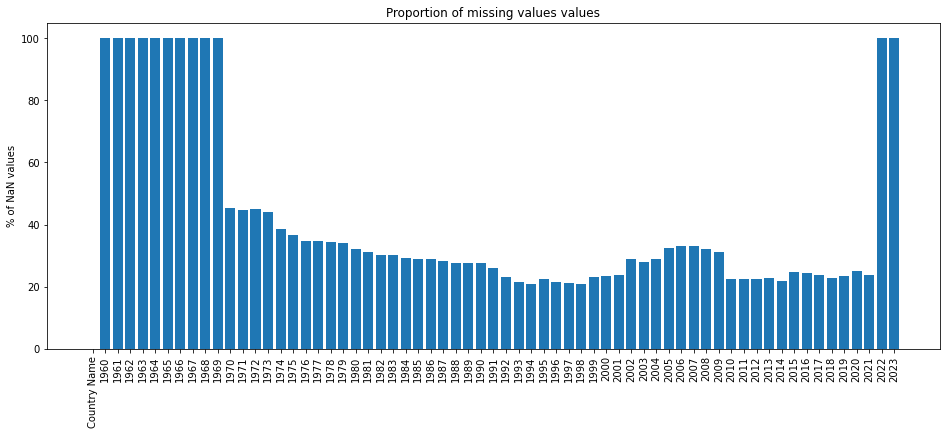

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.title("Proportion of missing values values")
plt.ylabel("% of NaN values")
plt.bar(x=flightdata.isna().sum(axis=0).index,height=100*flightdata.isna().sum(axis=0)/flightdata["Country Name"].count())


1960-1969 are empty
2022-2023 are empty
Only 1970-2021 have data
Need to remove columns with no flight data

<BarContainer object of 53 artists>

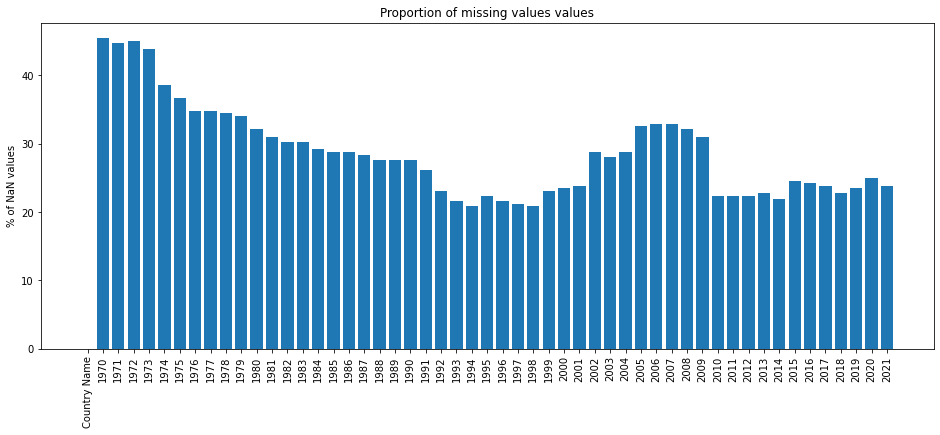

In [72]:
flightdata=flightdata.drop([f"{i}" for i in range(1960,1970)],axis=1)
flightdata=flightdata.drop([f"{i}" for i in range(2022,2024)],axis=1)

plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.title("Proportion of missing values values")
plt.ylabel("% of NaN values")
plt.bar(x=flightdata.isna().sum(axis=0).index,height=100*flightdata.isna().sum(axis=0)/flightdata["Country Name"].count())


Remove continents from "Country Name" column

In [73]:
flightdata=flightdata[~flightdata["Country Name"].isin(["Asia","Europe","World","North America","South America","Oceania","South America","Antarctica","Africa"])]

In [74]:
flightdata.shape


(264, 53)

Setting threshold to 20 loses ~100 countries however we can fill in missing values with interpolation and extrapolation without having to reduce accuracy too much. However, we can always change this later but interpolation and extrapolation may lose accuracy.

These will not be too long of regions and so we can use linear interpolation

In [75]:
flightdata=flightdata.dropna(thresh=35,axis=0)
flightdata.shape

(170, 53)

In [76]:
flightdata.iloc[:,1:] = flightdata.iloc[:,1:].interpolate(method="linear",limit_direction="both",axis=1)

We have no more missing values

In [77]:
flightdata.isna().sum().sum()

0

In [78]:
"""for column in flightdata.iloc[:,1:].T.columns:
    plt.figure()
    plt.title(f"{column}")
    plt.tight_layout()
    flightdata.iloc[:,1:].T[column].plot(title=column)  
    plt.show()"""

'for column in flightdata.iloc[:,1:].T.columns:\n    plt.figure()\n    plt.title(f"{column}")\n    plt.tight_layout()\n    flightdata.iloc[:,1:].T[column].plot(title=column)  \n    plt.show()'

In [79]:
flightdata = flightdata.melt(id_vars=["Country Name"],var_name="Year",value_name="Flights")

In [80]:
flightdata.sort_values("Flights",ascending=False)


,Country Name,Year,Flights
8391,High income,2019,2.715403e+09
8221,High income,2018,2.605541e+09
8447,OECD members,2019,2.504574e+09
8051,High income,2017,2.481592e+09
8277,OECD members,2018,2.413353e+09
...,...,...,...
4899,Sierra Leone,1998,0.000000e+00
7218,Jamaica,2012,0.000000e+00
7048,Jamaica,2011,0.000000e+00
4729,Sierra Leone,1997,0.000000e+00


Top flights are from non countries too and so need to be removed. All high numbers will be of aggregated groups. The bottom values will be actual values. Gonna cut it off from United States as they have the highest number of flights. Will be unable to parse other sub categories

In [81]:
flightdata.sort_values("Flights",ascending=False).iloc[527,:]

Country Name    United States
Year                     1976
Flights           223017296.0
Name: 1182, dtype: object

In [82]:
flightdata = flightdata.sort_values("Flights",ascending=False).iloc[527:,:]

In [83]:
flightdata

,Country Name,Year,Flights
1182,United States,1976,223017296.0
3953,East Asia & Pacific,1993,221775804.0
5991,East Asia & Pacific (excluding high income),2005,220887277.0
6098,East Asia & Pacific (IDA & IBRD countries),2005,220785964.0
4173,Low & middle income,1994,220249900.0
...,...,...,...
4899,Sierra Leone,1998,0.0
7218,Jamaica,2012,0.0
7048,Jamaica,2011,0.0
4729,Sierra Leone,1997,0.0


In [84]:
flightdata.to_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\CleanedData\FlightData.csv",index=False)